<a href="https://colab.research.google.com/github/fralfaro/MAT281_2023/blob/main/docs/labs/lab_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAT281 - Laboratorio N°05



## Problema 01
<img src="https://drive.google.com/uc?export=view&id=1Ha4ZjgvrlWHQ5vV_VydBkxiFXdgDn8TT" width = "200" align="center"/>


El **Iris dataset** es un conjunto de datos que contine una  muestras de tres especies de Iris (Iris setosa, Iris virginica e Iris versicolor). Se midió cuatro rasgos de cada muestra: el largo y ancho del sépalo y pétalo, en centímetros.

Lo primero es cargar el conjunto de datos y ver las primeras filas que lo componen:

In [15]:
# librerias

import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 500)  # Ver más columnas de los dataframes


# Ver gráficos de matplotlib en jupyter notebook/lab
%matplotlib inline

In [16]:
# cargar datos
data = pd.read_csv("https://raw.githubusercontent.com/fralfaro/MAT281_2022/main/labs/lab_05/data/iris_contaminados.csv")
data.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,4.4,3.2,1.3,3.0,setosa
1,7.2,3.6,6.1,2.5,virginica
2,6.3,3.3,6.0,2.5,VIRGINICA
3,6.7,3.3,5.7,2.5,virginica
4,6.3,3.4,5.6,2.4,virginica


### Bases del experimento

Lo primero es identificar las variables que influyen en el estudio y la naturaleza de esta.

* **species**:
    * Descripción: Nombre de la especie de Iris.
    * Tipo de dato: *string*
    * Limitantes: solo existen tres tipos (setosa, virginia y versicolor).
* **sepal_length**:
    * Descripción: largo del sépalo.
    * Tipo de dato: *float*.
    * Limitantes: los valores se encuentran entre 4.0 y 7.0 cm.
* **sepal_width**:
    * Descripción: ancho del sépalo.
    * Tipo de dato: *float*.
    * Limitantes: los valores se encuentran entre 2.0 y 4.5 cm.
* **petal_length**:
    * Descripción: largo del pétalo.
    * Tipo de dato: *float*.
    * Limitantes: los valores se encuentran entre 1.0 y 7.0 cm.
* **petalWidth**:
    * Descripción: ancho del pépalo.
    * Tipo de dato: *float*.
    * Limitantes: los valores se encuentran entre 0.1 y 2.5 cm.

Su objetivo es realizar un correcto **E.D.A.**, para esto debe seguir las siguientes intrucciones:

1. Realizar un conteo de elementos de la columna **species** y corregir según su criterio. Reemplace por "default" los valores `nan`.

In [17]:
# Desarrollo:

data['species'] = data['species'].str.lower() # Dejamos las valores de la columna species en minúscula
data['species'] = data['species'].str.strip()  # Eliminamos los espacios al principio y al final
data['species'].fillna("default",inplace = True) # Los valores de nan quedan reemplazados por default

cant_especies=len(data['species'].unique()) # contamos la cantidad de elementos en la columna 'species'
print("La cantidad de elementos en la columna 'species' es:",cant_especies)

La cantidad de elementos en la columna 'species' es: 4


2. Realizar un gráfico de box-plot sobre el largo y ancho de los petalos y sépalos. Reemplace por **0** los valores nan.

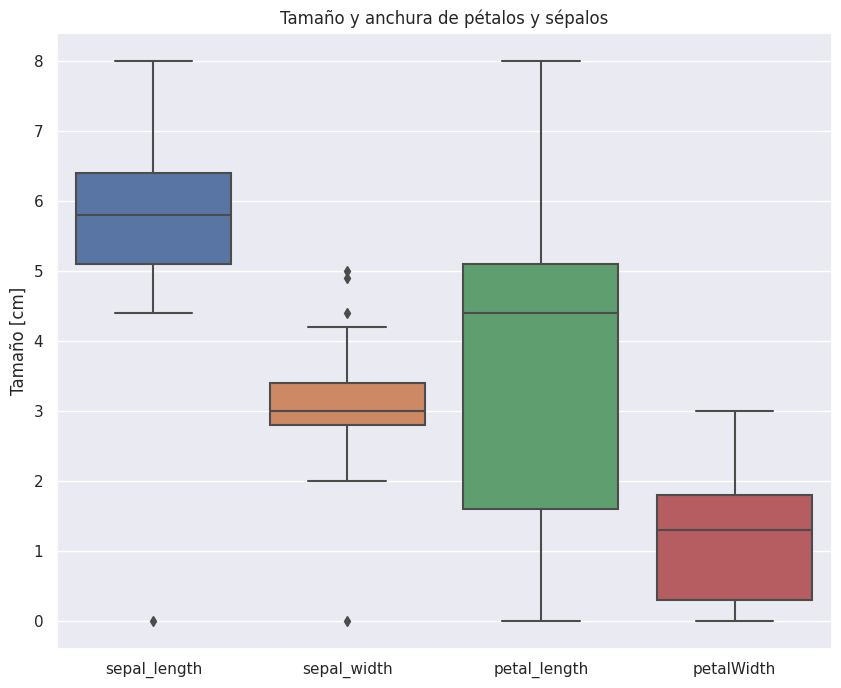

In [18]:
# Desarrollo:

data['sepal_length'] = data['sepal_length'].fillna(0.0) # Cambiamos nan por 0
data['sepal_width'] = data['sepal_width'].fillna(0.0)
data['petal_length'] = data['petal_length'].fillna(0.0)
data['petalWidth'] = data['petalWidth'].fillna(0.0)

sns.boxplot(data=data)
plt.title('Tamaño y anchura de pétalos y sépalos') # Nombramos el grafico
plt.ylabel('Tamaño [cm]') # Nombramos el eje y
plt.show()

3. Anteriormente se define un rango de valores válidos para los valores del largo y ancho de los petalos y sépalos. Agregue una columna denominada **label**  que identifique cuál de estos valores esta fuera del rango de valores válidos.

In [19]:
# Desarrollo:

rango_data = len(data)
Label = []
for k in range(rango_data): #Ponemos una condición que verifique que todos los rangos se están cumpliendo. De no cumplirse solo uno, está fuera de rango.
  if (data['sepal_length'][k]>7.0 or data['sepal_length'][k]<4.0) or (data['sepal_width'][k]>4.5 or data['sepal_length'][k]<2.0) or (data['petal_length'][k]>7.0 or data['petal_length'][k]<1.0) or (data['petalWidth'][k]>2.5 or data['petalWidth'][k]<0.1):
    Label.append("Fail") #Algún parámetro no está en el rango
  else:
    Label.append("Pass") #Todos los parámetros están en los rangos

data["label"]=Label
data

,sepal_length,sepal_width,petal_length,petalWidth,species,label
0,4.4,3.2,1.3,3.0,setosa,Fail
1,7.2,3.6,6.1,2.5,virginica,Fail
2,6.3,3.3,6.0,2.5,virginica,Pass
3,6.7,3.3,5.7,2.5,virginica,Pass
4,6.3,3.4,5.6,2.4,virginica,Pass
...,...,...,...,...,...,...
145,5.3,3.0,1.1,0.1,setosa,Pass
146,4.8,3.0,1.4,0.1,setosa,Pass
147,4.9,3.1,1.5,0.1,setosa,Pass
148,4.9,3.6,1.4,0.1,setosa,Pass


4. Realice un gráfico de *sepal_length* vs *petal_length* y otro de *sepal_width* vs *petalWidth* categorizados por la etiqueta **label**. Concluya sus resultados.

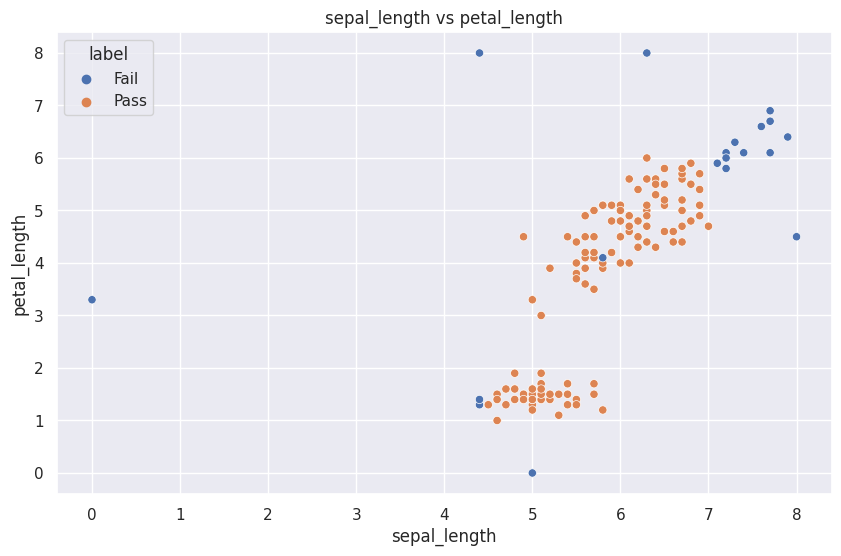

In [20]:
# Desarrollo:

plt.figure(figsize=(10, 6)) #Asignamos el tamaño
sns.scatterplot( #Creamos el grafico de dispersión
    x='sepal_length',
    y='petal_length',
    hue='label', #color cada clase (Fail y Pass)
    data=data,
)
plt.title('sepal_length vs petal_length')
plt.show()

5. Filtre los datos válidos y realice un gráfico de *sepal_length* vs *petal_length* categorizados por la etiqueta **species**.

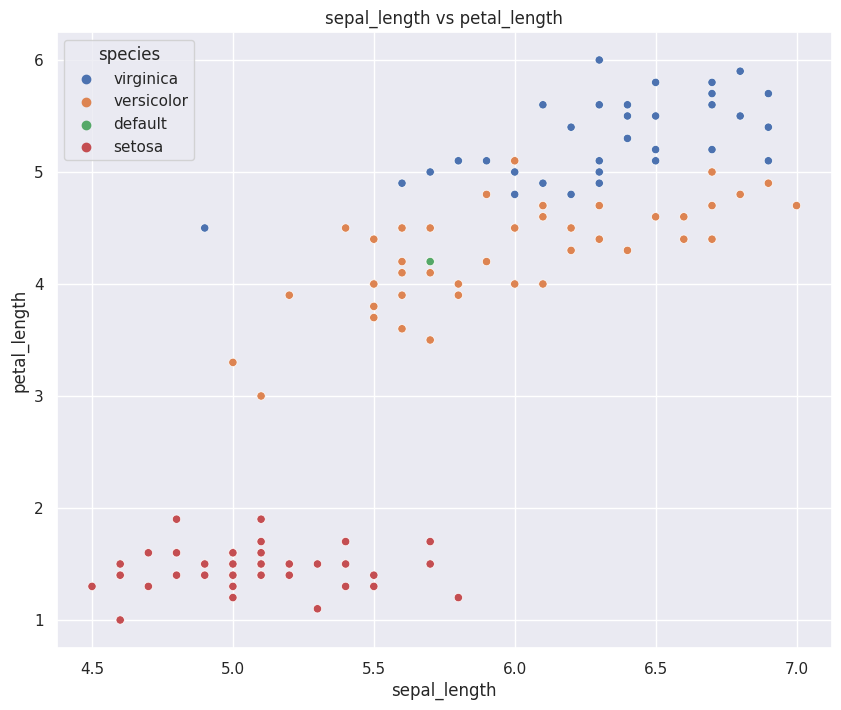

In [21]:
# Desarrollo:

sns.set(rc={'figure.figsize':(10,8)})
data_specie=data.loc[data['label']=='Pass']

sns.scatterplot(
        x='sepal_length',
        y='petal_length',
        data=data_specie,
        hue='species',
)
plt.title('sepal_length vs petal_length')
plt.show()